<a href="https://colab.research.google.com/github/DNVena/unsupervised-predict-streamlit-template/blob/master/Movies_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNSUPERVISED: MOVIE RECOMMENDATIONS 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('tags.csv')
df1.head()

,userId,movieId,tag,timestamp
0,3,260.0,classic,1.439472e+09
1,3,260.0,sci-fi,1.439472e+09
2,4,1732.0,dark comedy,1.573944e+09
3,4,1732.0,great dialogue,1.573944e+09
4,4,7569.0,so bad it's good,1.573943e+09


In [3]:
df2 = pd.read_csv('sample_submission.csv')
df2.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [4]:
df3 = pd.read_csv('genome_tags.csv')
df3.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [5]:
df4 = pd.read_csv('test.csv')
df4.head()

,userId,movieId
0,1,2011.0
1,1,4144.0
2,1,5767.0
3,1,6711.0
4,1,7318.0


In [130]:
df5 = pd.read_csv('train.csv')
df5.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [131]:
df6 = pd.read_csv('movies.csv')
df6.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
df8 = pd.read_csv('imdb_data.csv')
df8.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [13]:
df9 = pd.read_csv('genome_scores.csv')
df9.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


## **EDA**

**The** **Imports**

In [14]:
# Kaggle requirements
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [102]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

In [124]:
new_df = df5.merge(df6,on='movieId', how='left')
new_df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller


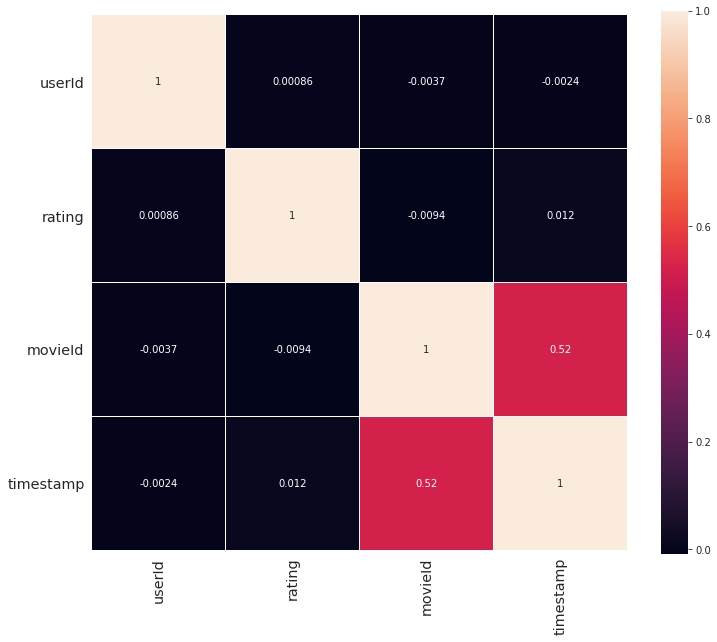

In [128]:
#To see correlation against significant features
new_data=new_df[['userId','rating','movieId','timestamp']]
col=['userId','rating','movieId','timestamp']
corr=new_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,square=True,linewidths=.15)
plt.xticks(label=col,size='x-large',rotation='vertical')
plt.yticks(y=col,size='x-large',rotation='horizontal')
plt.show()

In [129]:
#let us remove duplicity if there's any
print(new_df.shape)
movies_df = new_df.drop_duplicates(keep='first')
print(movies_df.shape)


(963094, 6)
(963094, 6)


Heatmap

Heatmap takes a rectangular data grid as input and then assigns a color intensity to each data cell based on the data value of the cell. This is a great way to get visual clues about the data.

We will generate a heatmap of the output of isnull() in order to detect missing values.

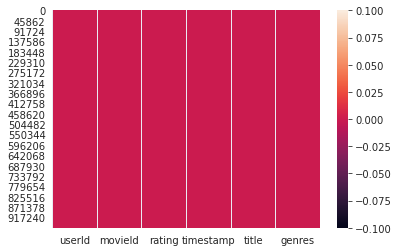

In [17]:
sns.heatmap(new_df.isnull())

In [18]:
new_df.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
title        False
genres       False
dtype: bool






















































































































































































































































































































































































































































































































Creating a ratings dataframe with average rating and number of ratings:

In [19]:
new_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Hamlet (Gamlet) (1964)                                   5.0
Walking the Streets of Moscow (1963)                     5.0
Asthenic Syndrome, The (Astenicheskiy sindrom) (1990)    5.0
At Any Price (2012)                                      5.0
Lucky Number (1951)                                      5.0
Name: rating, dtype: float64

In [20]:
new_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 3118
Pulp Fiction (1994)                 3104
Shawshank Redemption, The (1994)    3077
Silence of the Lambs, The (1991)    2907
Matrix, The (1999)                  2829
Name: rating, dtype: int64

In [21]:
ratings = pd.DataFrame(new_df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.0
#1 Cheerleader Camp (2010),1.0
#FollowMe (2019),3.0
#Horror (2015),2.0
$ (Dollars) (1971),3.5


Now set the number of ratings column

In [22]:
ratings['num of ratings'] = pd.DataFrame(new_df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",3.0,2
#1 Cheerleader Camp (2010),1.0,1
#FollowMe (2019),3.0,1
#Horror (2015),2.0,3
$ (Dollars) (1971),3.5,3


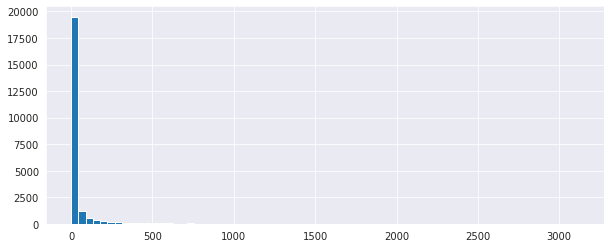

In [23]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

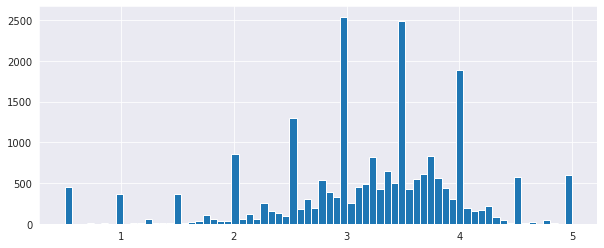

In [24]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

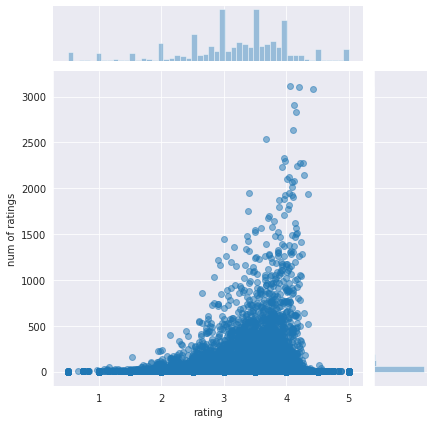

In [25]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [26]:
new_df['title'] = new_df['title'].astype('str')

In [27]:
title_corpus = ' '.join(new_df['title'])

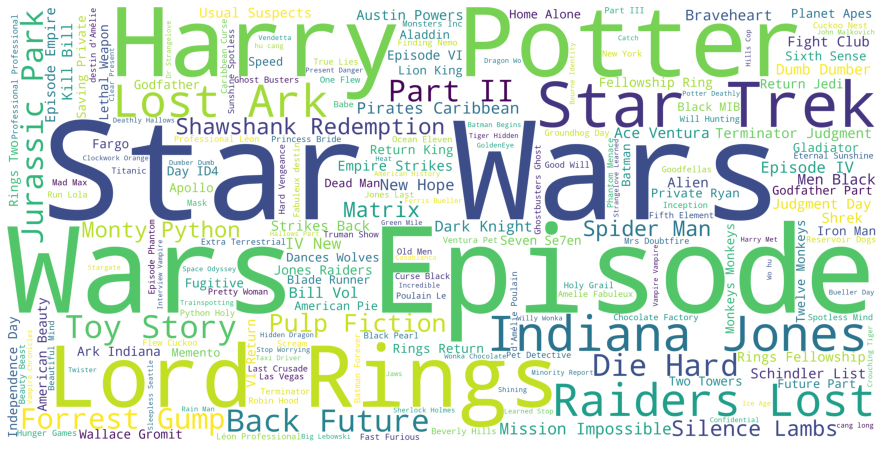

In [28]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The word **Star Wars** is the most commonly used word in movie titles. Lord Rings, Harry Potter and Trek are also among the most commonly occuring words. I think this encapsulates the idea of the ubiquitious presence of fantasy in movies pretty well.

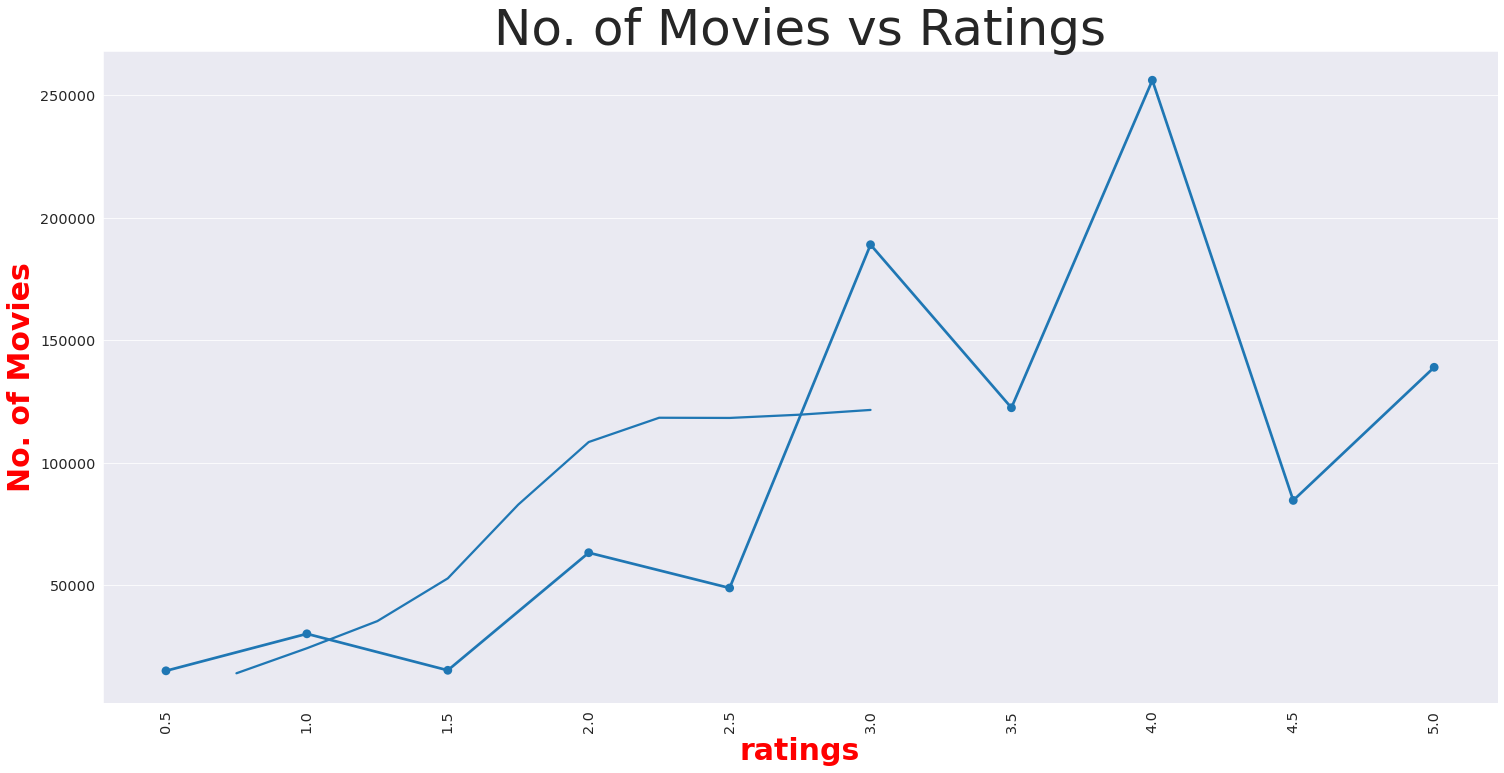

In [73]:
#Number of movies against ratings average
s=new_df.groupby('rating').count()
plt.figure(figsize=(25,12))
sns.pointplot(x=np.array(s.index),y=s['timestamp'])
sns.regplot(x=np.array(s.index),y=s['timestamp'],scatter=False,lowess=True)
plt.xticks(x=s.index,rotation='vertical',size='x-large')
plt.yticks(size='x-large')

plt.xlabel("ratings",size=30,weight='heavy',color='red')
plt.ylabel('No. of Movies',weight='heavy',color='red',size=30)
plt.title('No. of Movies vs Ratings',size=50)

plt.show()

In [96]:
new_df = new_df.head(5000)
util_matrix = new_df.pivot_table(index=['userId'],
                                       columns=['title'],
                                       values='rating')
util_matrix.shape

(4727, 2419)

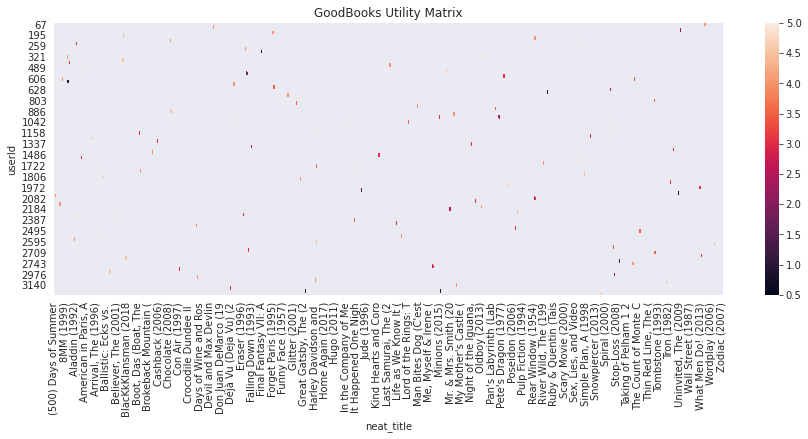

In [98]:
# Create a neat version of the utility matrix to assist with plotting book titles 
new_df['neat_title'] = new_df['title'].apply(lambda x: x[:20])
util_matrix_neat = new_df.pivot_table(index=['userId'],
                                            columns=['neat_title'],
                                            values='rating')

fig, ax = plt.subplots(figsize=(15,5))
# We select only the first 100 users for ease of computation and visualisation. 
# You can play around with this value to see more of the utility matrix. 
_ = sns.heatmap(util_matrix_neat[:100], annot=False, ax=ax).set_title('GoodBooks Utility Matrix')

In [100]:
import scipy as sp
# Normalize each row (a given user's ratings) of the utility matrix
util_matrix_norm = util_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
# Fill Nan values with 0's, transpose matrix, and drop users with no ratings
util_matrix_norm.fillna(0, inplace=True)
util_matrix_norm = util_matrix_norm.T
util_matrix_norm = util_matrix_norm.loc[:, (util_matrix_norm != 0).any(axis=0)]
# Save the utility matrix in scipy's sparse matrix format
util_matrix_sparse = sp.sparse.csr_matrix(util_matrix_norm.values)

In [103]:
# Compute the similarity matrix using the cosine similarity metric
user_similarity = cosine_similarity(util_matrix_sparse.T)
# Save the matrix as a dataframe to allow for easier indexing  
user_sim_df = pd.DataFrame(user_similarity,
                           index = util_matrix_norm.columns,
                           columns = util_matrix_norm.columns)

# Review a small portion of the constructed similartiy matrix  
user_sim_df[:5]

userId,606,997,2316,3367,5245,5572,6063,6482,7895,9567,10106,11638,12701,14455,14486,14831,14922,15032,15044,16541,17783,18093,19475,19886,19997,20055,25296,25771,26893,29054,29145,29791,29914,32292,33793,33913,35084,35149,35963,35992,...,113588,113693,114730,115211,116035,116233,116544,118041,120392,123006,128679,129793,130756,131133,131174,131506,132976,133377,134401,134908,136772,137293,139253,139287,140463,141388,142061,142132,142286,143027,143049,144851,145626,147008,149477,154059,155408,158109,159361,160179
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
606,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2316,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5245,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
def collab_generate_top_N_recommendations(user, N=10, k=20):
    # Cold-start problem - no ratings given by the reference user. 
    # With no further user data, we solve this by simply recommending
    # the top-N most popular movies in the item catalog. 
    if user not in user_sim_df.columns:
        return new_df.groupby('title').mean().sort_values(by='rating',
                                        ascending=False).index[:N].to_list()

    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    favorite_user_items = [] # <-- List of highest rated items gathered from the k users  
    most_common_favorites = {} # <-- Dictionary of highest rated items in common for the k users

    for i in sim_users:
        # Maximum rating given by the current user to an item 
        max_score = util_matrix_norm.loc[:, i].max()
        # Save the names of items maximally rated by the current user   
        favorite_user_items.append(util_matrix_norm[util_matrix_norm.loc[:, i]==max_score].index.tolist())

    # Loop over each user's favorite items and tally which ones are 
    # most popular overall.
    for item_collection in range(len(favorite_user_items)):
        for item in favorite_user_items[item_collection]:
            if item in most_common_favorites:
                most_common_favorites[item] += 1
            else:
                most_common_favorites[item] = 1
    # Sort the overall most popular items and return the top-N instances
    sorted_list = sorted(most_common_favorites.items(), key=operator.itemgetter(1), reverse=True)[:N]
    top_N = [x[0] for x in sorted_list]
    return top_N

In [110]:
collab_generate_top_N_recommendations(5163)

['Tuck Everlasting (2002)',
 'If Lucy Fell (1996)',
 'English Patient, The (1996)',
 'And Then There Were None (1945)',
 "Who's Afraid of Virginia Woolf? (1966)",
 'Escape to Witch Mountain (1975)',
 'Animal House (1978)',
 'White Nights (1985)',
 'Annie Hall (1977)',
 'White Diamond, The (2004)']

In [111]:
# User 5163's historical ratings
new_df[new_df['userId'] == 5163][:][['title','rating']].sort_values(by='rating', ascending=False)[:10]

,title,rating
0,In Bruges (2008),4.0


In [119]:
def collab_generate_rating_estimate(movie_title, user, k=20, threshold=0.0):
    # k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    # Store the corresponding user's similarity values 
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:k+1]
    rating_list = [] # <-- List of k user's ratings for the reference item
    weight_list = [] # <-- List of k user's similarities to the reference user

    # Creating a weighted sum for each of the k users who have rated the 
    # reference item (movie).
    for sim_idx, user_id in enumerate(sim_users):
        # User's rating of the item
        rating = util_matrix.loc[user_id, book_title]
        # User's similarity to the reference user 
        similarity = user_values[sim_idx]
        # Skip the user if they have not rated the item, or are too dissimilar to 
        # the reference user
        if (np.isnan(rating)) or (similarity < threshold):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    try:
        # Return the weighted sum as the predicted rating for the reference item
        predicted_rating = sum(rating_list)/sum(weight_list)
    except ZeroDivisionError:
        # If no ratings for the reference item can be collected, return the average 
        # rating given by all users for the item.  
        predicted_rating = np.mean(util_matrix[movie_title])
    return predicted_rating

In [31]:
new_df8 = df8.copy()
new_df8.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [32]:
new_df8.isnull().sum(axis = 0)

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [33]:
new_df8.isnull().any()

movieId          False
title_cast        True
director          True
runtime           True
budget            True
plot_keywords     True
dtype: bool

In [34]:
movies = new_df8[new_df8.plot_keywords.notnull()]
number_of_keyword_chars = []
for keywords in movies['plot_keywords'][:10000]:
    n_chars = len(keywords)
    number_of_keyword_chars.append(n_chars)

<function matplotlib.pyplot.show>

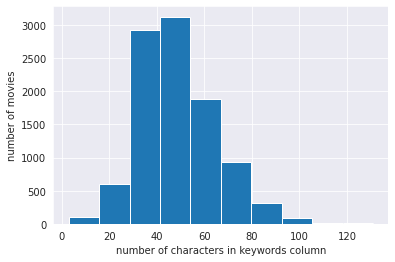

In [35]:
#Plotting a histogram showing the length (in characters) of each keyword list
plt.hist(number_of_keyword_chars)
plt.xlabel('number of characters in keywords column')
plt.ylabel('number of movies')
plt.show

In [36]:
#Now let plot a distribution for the number of words in each keyword list:
number_of_keywords = []
for keywords in movies['plot_keywords']:
    n_keywords = len(keywords.split(','))
    number_of_keywords.append(n_keywords)

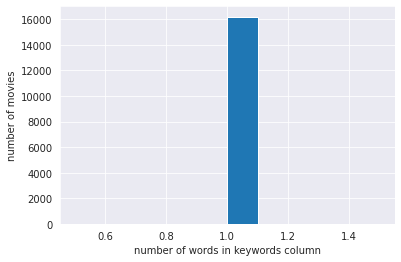

In [37]:
plt.hist(number_of_keywords)
plt.xlabel('number of words in keywords column')
plt.ylabel('number of movies')
plt.show()

Some movies in the database have zero budget which implies that their values have not been recorded or some information is missing. We will be discarding such entries from the dataframe:


In [43]:
cols = ['budget','title_cast','director','plot_keywords','budget','runtime']
new_df8[cols] = new_df8[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
new_df8.dropna(subset=cols, inplace=True)
new_df8.shape

(6963, 6)

In [44]:
new_df8.isnull().any()

movieId          False
title_cast       False
director         False
runtime          False
budget           False
plot_keywords    False
dtype: bool

Correlation matrix between feautures under merged train data with movies data(new_df)

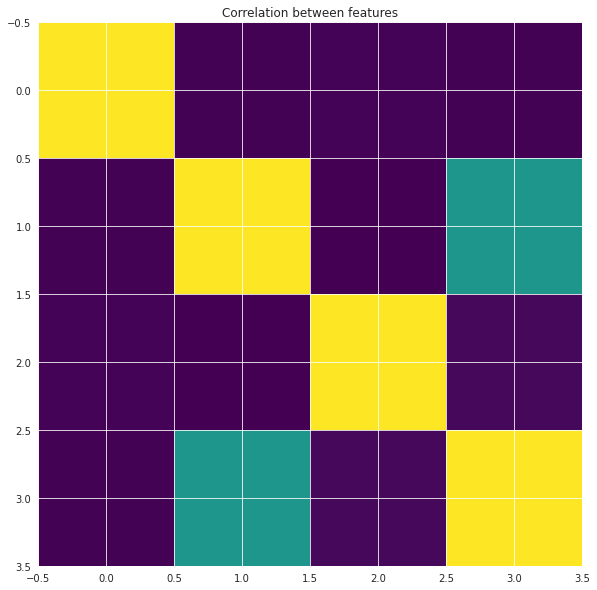

In [71]:
# correlation matrix

# instaniate the figure
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()

# plot using matplotlib
ax.imshow(new_df.corr(), cmap = 'viridis', interpolation = 'nearest')

# set the title for the figure
ax.set_title("Correlation between features");